## Transfer Learning Inception V3 using Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download the dataset from the below url

In [46]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [45]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

black_path = '/content/drive/MyDrive/Programs/Datasets/bears/black'
grizzly_path = '/content/drive/MyDrive/Programs/Datasets/bears/grizzly'
teddy_path = '/content/drive/MyDrive/Programs/Datasets/bears/teddy'


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3 # Commented out the original import
from tensorflow.keras.applications import InceptionV3 # Import InceptionV3 directly from tensorflow.keras.applications
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Programs/Datasets/bears/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,956,387 (83.76 MB)

 Trainable params: 153,603 (600.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Programs/Datasets/bears/', # Changed to the full path of your dataset
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 288 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Programs/Datasets/bears/',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 288 images belonging to 3 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 296s 16s/step - accuracy: 0.8350 - loss: 0.8032 - val_accuracy: 0.9826 - val_loss: 0.3270
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 130s 5s/step - accuracy: 0.9780 - loss: 0.4413 - val_accuracy: 0.9826 - val_loss: 0.3018
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.9752 - loss: 0.5506 - val_accuracy: 0.9583 - val_loss: 0.4980
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 98s 6s/step - accuracy: 0.9846 - loss: 0.3652 - val_accuracy: 0.9896 - val_loss: 0.0901
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 95s 5s/step - accuracy: 0.9839 - loss: 0.2780 - val_accuracy: 0.9792 - val_loss: 0.3956
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.9739 - loss: 0.6403 - val_accuracy: 0.9826 - val_loss: 0.1739
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 94s 5s/step - accuracy: 0.9802 - loss: 0.1982 - val_accuracy: 0.9931 - val_loss: 0.1639
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.9943 - loss: 0.0565 - val_accuracy: 0.9931 - val_

In [44]:
import matplotlib.pyplot as plt

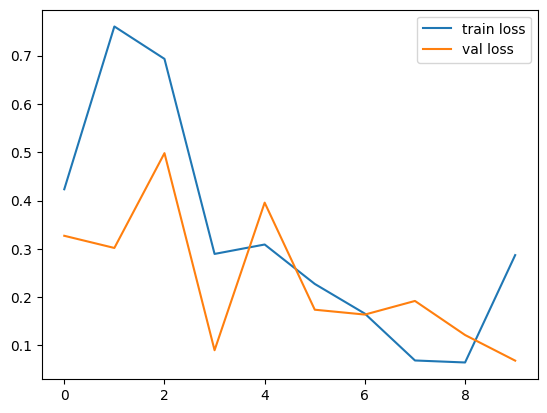

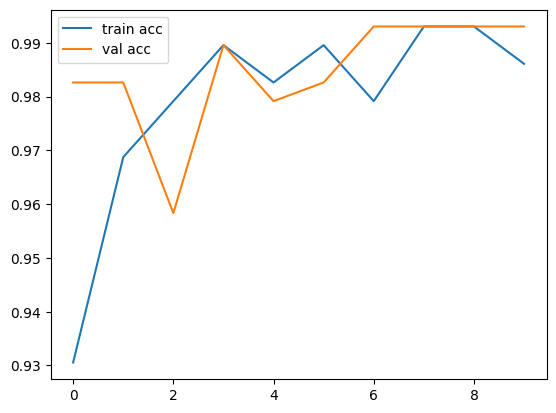

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt # This line imports the necessary module and assigns it to the alias 'plt'

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [22]:

y_pred = model.predict(test_set)


18/18 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step


In [23]:
y_pred

array([[9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01],
       [3.28507300e-36, 0.00000000e+00, 9.99999940e-01],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01],
       [9.99999940e-01, 5.68086308e-36, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01],
       [4.04847395e-19, 9.99999940e-01, 1.58320969e-36],
       [2.72562680e-12, 9.99999940e-01, 2.00447490e-28],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01],
       [5.88713567e-38, 0.00000000e+00, 9.99999940e-01],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01],
       [9.99999940e-01, 1.61604098e-32, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01],
       [2.94006033e-30, 9.99999940e-01, 5.46221403e-35],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01],
       [0.00000000e+00, 0.00000

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1,
       2, 0, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 2,
       1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2,
       2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0,
       0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 1, 0,
       1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1,
       0, 0, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1,
       0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2,
       2, 1])

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
# Assuming your model is saved in '/content/drive/MyDrive/Programs/model_resnet50.h5'
# Modify the path accordingly if it is saved in a different location

# Ensure the path is correct, and the file exists
model_path = '/content/drive/MyDrive/Programs/model_resnet50.h5'  # Verify this path

# Check if the file exists
import os
if not os.path.exists(model_path):
  print(f"Error: File not found at {model_path}")
  # Potentially handle the error, like asking the user for the correct path
else:
  model = load_model(model_path)

Error: File not found at /content/drive/MyDrive/Programs/model_resnet50.h5


In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
# Assuming your model is saved in '/content/drive/MyDrive/Programs/model_resnet50.h5'
# Modify the path accordingly if it is saved in a different location

# Ensure the path is correct, and the file exists
model_path = '/content/drive/MyDrive/Programs/model_resnet50.h5'  # Verify this path

# Check if the file exists
import os
if not os.path.exists(model_path):
  print(f"Error: File not found at {model_path}")
  # Potentially handle the error, like asking the user for the correct path
else:
  model = load_model(model_path)

# Load and preprocess the image
img=image.load_img('/content/drive/MyDrive/Programs/Datasets/bears/black/00000000.jpg',target_size=(224,224))
x=image.img_to_array(img)
x=x/255
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x) # img_data is now defined

# Now you can access img_data
img_data

Error: File not found at /content/drive/MyDrive/Programs/model_resnet50.h5


array([[[[-0.99695504, -0.99729335, -0.9971088 ],
         [-0.9969858 , -0.99729335, -0.9973241 ],
         [-0.9981546 , -0.99858516, -0.9986159 ],
         ...,
         [-0.99800074, -0.99797   , -0.9984006 ],
         [-0.99852365, -0.99830836, -0.99886197],
         [-0.998985  , -0.99867743, -0.99941564]],

        [[-0.99695504, -0.99729335, -0.9971703 ],
         [-0.9976624 , -0.9980315 , -0.99797   ],
         [-0.9976932 , -0.99800074, -0.9980623 ],
         ...,
         [-0.9980623 , -0.99797   , -0.9985544 ],
         [-0.9988312 , -0.99852365, -0.99929255],
         [-0.9991695 , -0.9988312 , -0.99975395]],

        [[-0.99735487, -0.9977547 , -0.9975394 ],
         [-0.9978777 , -0.99846214, -0.99858516],
         [-0.99612457, -0.99655515, -0.9966474 ],
         ...,
         [-0.9984006 , -0.9982776 , -0.998985  ],
         [-0.99901575, -0.99867743, -0.9996617 ],
         [-0.998985  , -0.99867743, -0.9997232 ]],

        ...,

        [[-0.99489427, -0.99544793, -0

In [34]:
img=image.load_img('/content/drive/MyDrive/Programs/Datasets/bears/black/00000000.jpg',target_size=(224,224))



In [35]:
x=image.img_to_array(img)
x

array([[[ 99.,  88.,  94.],
        [ 98.,  88.,  87.],
        [ 60.,  46.,  45.],
        ...,
        [ 65.,  66.,  52.],
        [ 48.,  55.,  37.],
        [ 33.,  43.,  19.]],

       [[ 99.,  88.,  92.],
        [ 76.,  64.,  66.],
        [ 75.,  65.,  63.],
        ...,
        [ 63.,  66.,  47.],
        [ 38.,  48.,  23.],
        [ 27.,  38.,   8.]],

       [[ 86.,  73.,  80.],
        [ 69.,  50.,  46.],
        [126., 112., 109.],
        ...,
        [ 52.,  56.,  33.],
        [ 32.,  43.,  11.],
        [ 33.,  43.,   9.]],

       ...,

       [[166., 148., 136.],
        [161., 132., 118.],
        [180., 160., 149.],
        ...,
        [115., 127.,  89.],
        [116., 134.,  76.],
        [ 86.,  98.,  52.]],

       [[191., 168., 154.],
        [181., 151., 141.],
        [157., 133., 121.],
        ...,
        [142., 154., 116.],
        [114., 129.,  90.],
        [ 95., 106.,  74.]],

       [[177., 152., 132.],
        [180., 140., 132.],
        [148., 1

In [36]:
x.shape

(224, 224, 3)

In [37]:
x=x/255

In [38]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[8.7456347e-04, 8.0266695e-08, 9.9912542e-01]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


In [41]:
a==1

array([False])

In [42]:
import tensorflow as tf

In [43]:
tf.__version__

'2.18.0'